In [1]:
%matplotlib inline
import sympy
import matplotlib.pyplot as plt
import numpy as np
sympy.init_printing()

In [2]:
def inv_laplace(Y):
    s, t = sympy.symbols('s, t')
    # define a function to perform more complicated inv laplace
    y = 0
    for a in Y.apart().expand().args:
        y += sympy.inverse_laplace_transform(a, s, t)
    y = y.subs(
        {sympy.InverseLaplaceTransform(s, s, t, None): sympy.DiracDelta(t)}
    )
    return y
        
def responses(G, R):
    s, t = sympy.symbols('s, t')

    ER = (1/(1 + G)).simplify()
    YR = (G/(1 + G)).simplify()
    Y = YR*R
    
    r = sympy.inverse_laplace_transform(R, s, t)
    y = inv_laplace(Y)
    e = r - y
    return locals()

def f_eval(f):
    return sympy.lambdify((t), (f), modules=['numpy', {
        'Heaviside': lambda x: np.heaviside(x, 1)}])

def plots(res, t_vect):
    plt.plot(t_vect, f_eval(res['r'])(t_vect), label='r')
    plt.plot(t_vect, f_eval(res['y'])(t_vect), label='y')
    plt.plot(t_vect, f_eval(res['e'])(t_vect), 'k--', label='e')
    plt.legend()
    plt.xlabel('t')

# Type 0

In [3]:
zeta = 0.75
omega_n = 3
s, t = sympy.symbols('s, t')
G = 1/(s**2 + 2*zeta*omega_n*s + omega_n**2)

$K_p = 1/9$

$e_{ss} = \frac{1}{1 + K_p} = 9/10$

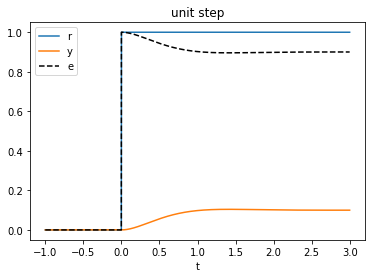

In [4]:
res = responses(G, 1/s)
plots(res, np.arange(-1, 3, 0.001))
plt.title('unit step');

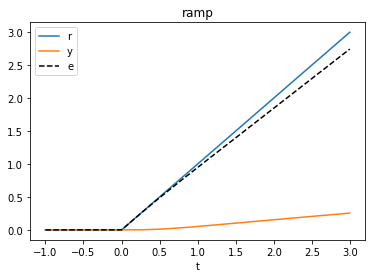

In [5]:
res = responses(G, 1/s**2)
t_vect = np.arange(-1, 3, 0.001)
plots(res, np.arange(-1, 3, 0.001))
plt.title('ramp');

# Type 1

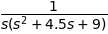

In [6]:
G2 = G/s
G2

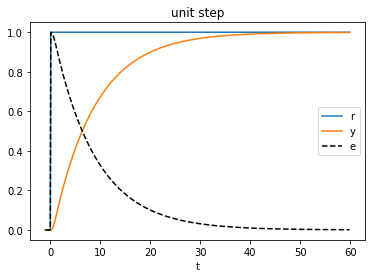

In [7]:
res = responses(G2, 1/s)
plots(res, np.arange(-1, 60, 0.1))
plt.title('unit step');

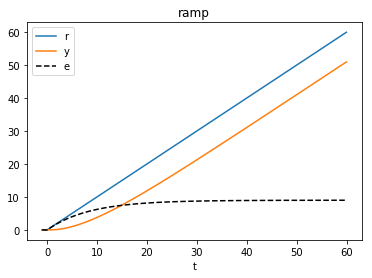

In [8]:
res = responses(G2, 1/s**2)
plots(res, np.arange(-1, 60, 0.1))
plt.title('ramp');

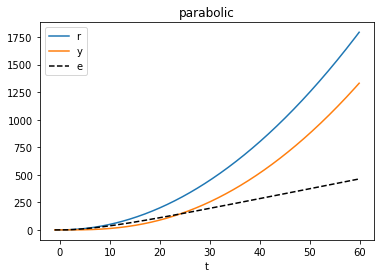

In [9]:
res = responses(G2, 1/s**3)
plots(res, np.arange(-1, 60, 0.1))
plt.title('parabolic');

# Non-Symbolic Approach

In [10]:
import control
s = control.tf([1, 0], [0, 1])
G = 1/(s*(s**2 + 4.5*s + 9))
G


         1
-------------------
s^3 + 4.5 s^2 + 9 s

In [11]:
Kp = np.real(control.minreal(G, verbose=False).horner(0)[0][0])
ess_step = 1/(1 + Kp)
Kp, ess_step

/home/jgoppert/anaconda3/envs/aae364/lib/python3.7/site-packages/control/xferfcn.py:575: RuntimeWarning: divide by zero encountered in double_scalars
  polyval(self.den[i][j], s))


In [12]:
Kv = np.real(control.minreal(s*G, verbose=False).horner(0)[0][0])
ess_ramp = 1/Kv
Kv, ess_ramp

In [13]:
Ka = np.real(control.minreal(s**2*G, verbose=False).horner(0)[0][0])
ess_parab = 1/Ka
Ka, ess_parab

/home/jgoppert/anaconda3/envs/aae364/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


Text(0.5, 1.0, 'unit step')

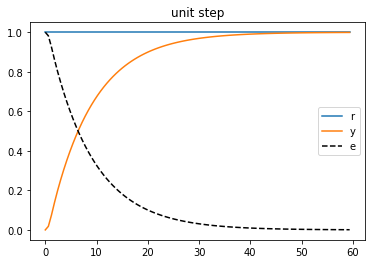

In [14]:
t, y = control.step_response((G/(1 + G)))
r = np.ones(len(t))
plt.plot(t, r, label='r')
plt.plot(t, y, label='y')
plt.plot(t, r - y, 'k--', label='e')
plt.legend()
plt.title('unit step')

Text(0.5, 1.0, 'ramp')

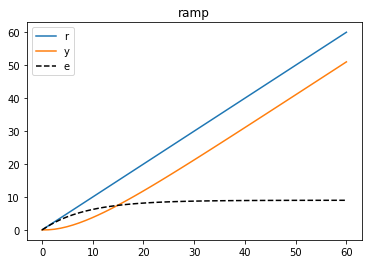

In [15]:
t = np.linspace(0, 60)
t, y = control.step_response((G/(1 + G))/s, t)
r = t
plt.plot(t, r, label='r')
plt.plot(t, y, label='y')
plt.plot(t, r - y, 'k--', label='e')
plt.legend()
plt.title('ramp')

Text(0.5, 1.0, 'parabolic')

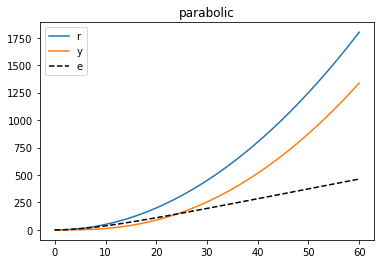

In [16]:
t = np.linspace(0, 60)
t, y = control.step_response((G/(1 + G))/s**2, t)
r = t**2/2
plt.plot(t, r, label='r')
plt.plot(t, y, label='y')
plt.plot(t, r - y, 'k--', label='e')
plt.legend()
plt.title('parabolic')

Text(0.5, 1.0, 'step')

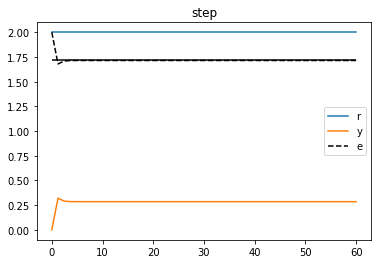

In [17]:
t = np.linspace(0, 60)
G = (s+1)/((s+2)*(s+3))
t, y = control.step_response((G/(1 + G))*2, t)
r = 2*np.ones(len(t))
plt.plot(t, r, label='r')
plt.plot(t, y, label='y')
plt.hlines(12.0/7, t[0], t[-1])
plt.plot(t, r - y, 'k--', label='e')
plt.legend()
plt.title('step')

Text(0.5, 1.0, 'step')

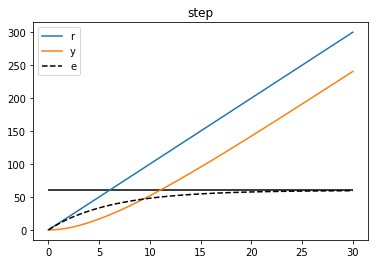

In [18]:
t = np.linspace(0, 30)
G = (s+1)/(s*(s+2)*(s+3))
t, y = control.step_response((G/(1 + G))*10/s, t)
r = 10*t
plt.plot(t, r, label='r')
plt.plot(t, y, label='y')
plt.plot(t, r - y, 'k--', label='e')
plt.hlines(60, 0, 30)
plt.legend()
plt.title('step')

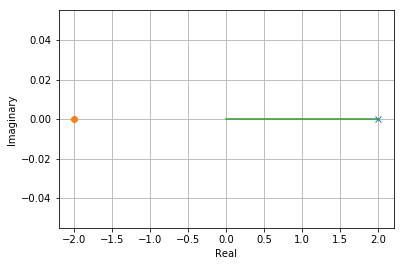

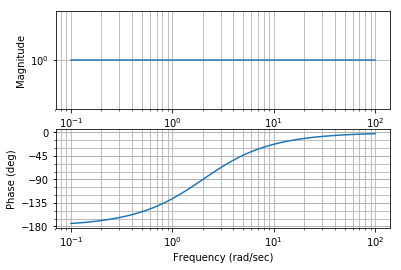

In [19]:
G = (s+2)/(s-2)
control.rlocus(G, np.linspace(0, 1, 1000));
plt.grid();

plt.figure()
control.bode(G);

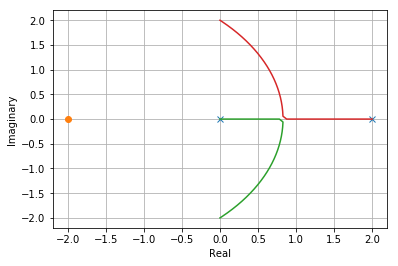

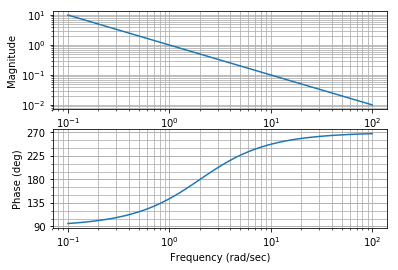

In [20]:
G = (s+2)/(s*(s-2))
control.rlocus(G, np.linspace(0, 2, 1000));
plt.grid();

plt.figure()
control.bode(G);